Recommendation system

Data Preprocessing:

Load the dataset into a suitable data structure (e.g., pandas DataFrame).

Handle missing values, if any.

Explore the dataset to understand its structure and attributes.


In [5]:
#importing libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [8]:
data=pd.read_csv('anime.csv')
data

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [9]:
data.shape

(12294, 7)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [11]:
data.isnull().sum() #check missing value

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [12]:
#drop null value
df1=data.dropna()

In [13]:
#check null value
df1.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [15]:
#check for duplicated value
df1.duplicated().sum()

0

no duplicate value

In [19]:
df1.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12017 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12017 non-null  int64  
 1   name      12017 non-null  object 
 2   genre     12017 non-null  object 
 3   type      12017 non-null  object 
 4   episodes  12017 non-null  object 
 5   rating    12017 non-null  float64
 6   members   12017 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 751.1+ KB


In [18]:
df1.describe()

,anime_id,rating,members
count,12017.000000,12017.000000,1.201700e+04
mean,13638.001165,6.478264,1.834888e+04
std,11231.076675,1.023857,5.537250e+04
min,1.000000,1.670000,1.200000e+01
25%,3391.000000,5.890000,2.250000e+02
50%,9959.000000,6.570000,1.552000e+03
75%,23729.000000,7.180000,9.588000e+03
max,34519.000000,10.000000,1.013917e+06


In [20]:
#checking unique value
df1.nunique()

anime_id    12017
name        12015
genre        3229
type            6
episodes      187
rating        598
members      6596
dtype: int64

In [23]:
df1['genre'].value_counts()

genre
Hentai                                                   816
Comedy                                                   521
Music                                                    297
Kids                                                     197
Comedy, Slice of Life                                    174
                                                        ... 
Adventure, Comedy, Horror, Shounen, Supernatural           1
Comedy, Harem, Romance, School, Seinen, Slice of Life      1
Comedy, Ecchi, Sci-Fi, Shounen                             1
Adventure, Shounen, Sports                                 1
Hentai, Slice of Life                                      1
Name: count, Length: 3229, dtype: int64

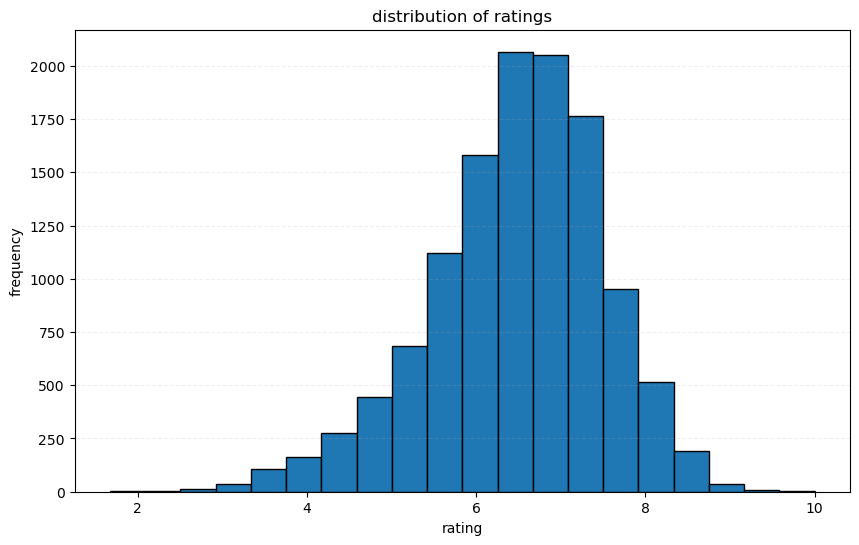

In [27]:
plt.figure(figsize=(10,6))
plt.hist(df1['rating'],bins=20,edgecolor='black')
plt.title('distribution of ratings')
plt.xlabel('rating')
plt.ylabel('frequency')
plt.grid(axis='y',alpha=0.2,linestyle="--")
#linestyle is type of line
#alpha is the opacity of the grid
plt.show()

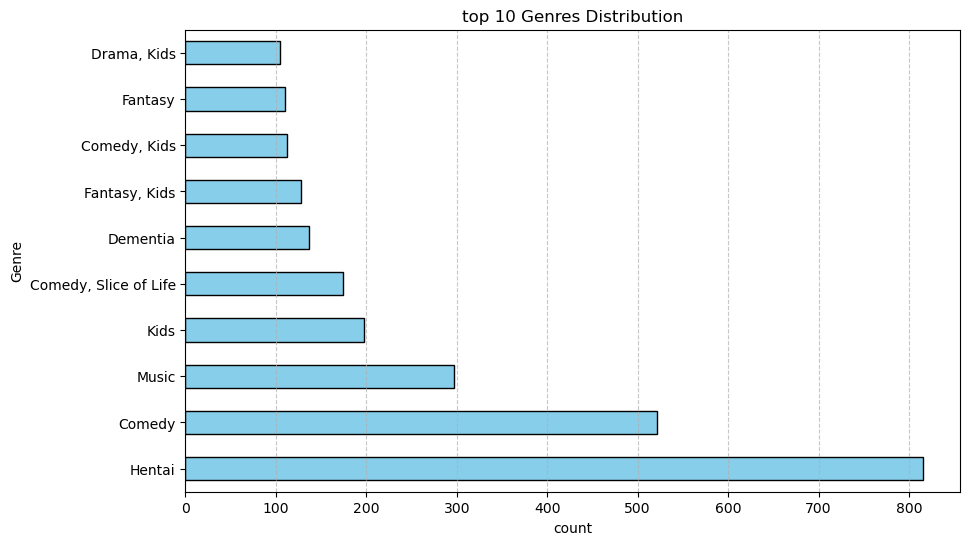

In [28]:
top_genres = df1['genre'].value_counts().head(10)
plt.figure(figsize=(10,6))
top_genres.plot(kind='barh',color='skyblue',edgecolor='black')
plt.title('top 10 Genres Distribution')
plt.xlabel('count')
plt.ylabel('Genre')
plt.grid(axis='x',linestyle='--',alpha=0.7)
plt.show()

Features Extraction

In [29]:
#convert categorical features "genre" into numerical representations using One-hot encode

genres = df1['genre'].str.get_dummies(sep=',')
df_numerical = pd.concat([df1.drop('genre',axis=1),genres], axis=1)

In [30]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
numerical_cols = ['rating','members']
df_numerical[numerical_cols] = scaler.fit_transform(df_numerical[numerical_cols])
df_numerical.head()

,anime_id,name,type,episodes,rating,members,Adventure,Cars,Comedy,Dementia,...,Shoujo,Shounen,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi
0,32281,Kimi no Na wa.,Movie,1,2.824474,3.292044,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,TV,64,2.717032,14.002410,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,28977,Gintama°,TV,51,2.707265,1.732216,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,9253,Steins;Gate,TV,24,2.629126,11.833499,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9969,Gintama&#039;,TV,51,2.619358,2.400518,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


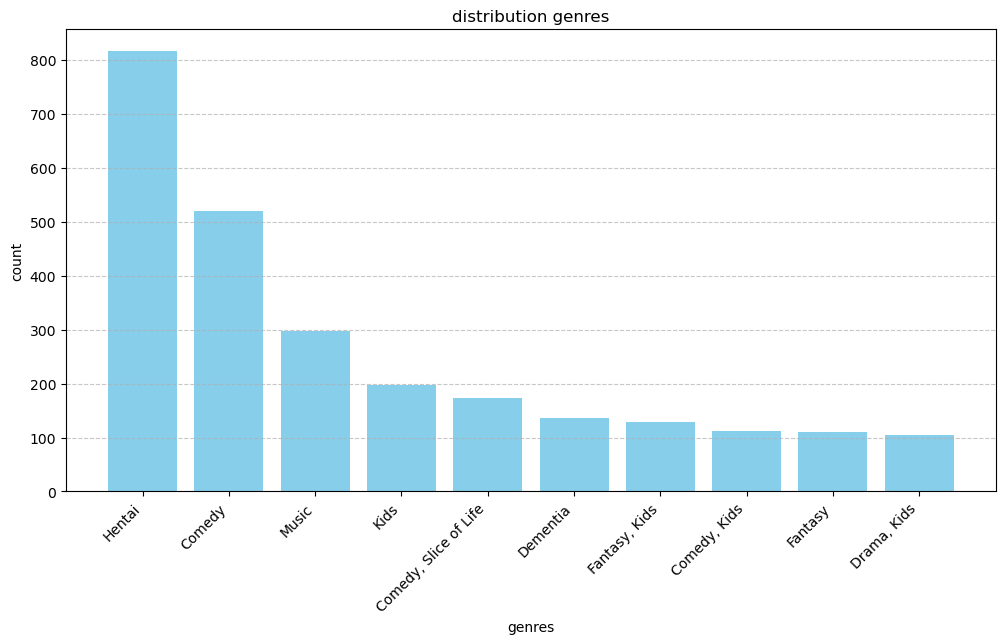

In [32]:
genre_counts = df1['genre'].value_counts().head(10)
plt.figure(figsize=(12,6))
plt.bar(genre_counts.index,genre_counts.values,color='skyblue')
plt.title('distribution genres')
plt.xlabel('genres')
plt.ylabel('count')
plt.xticks(rotation=45,ha='right')
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()


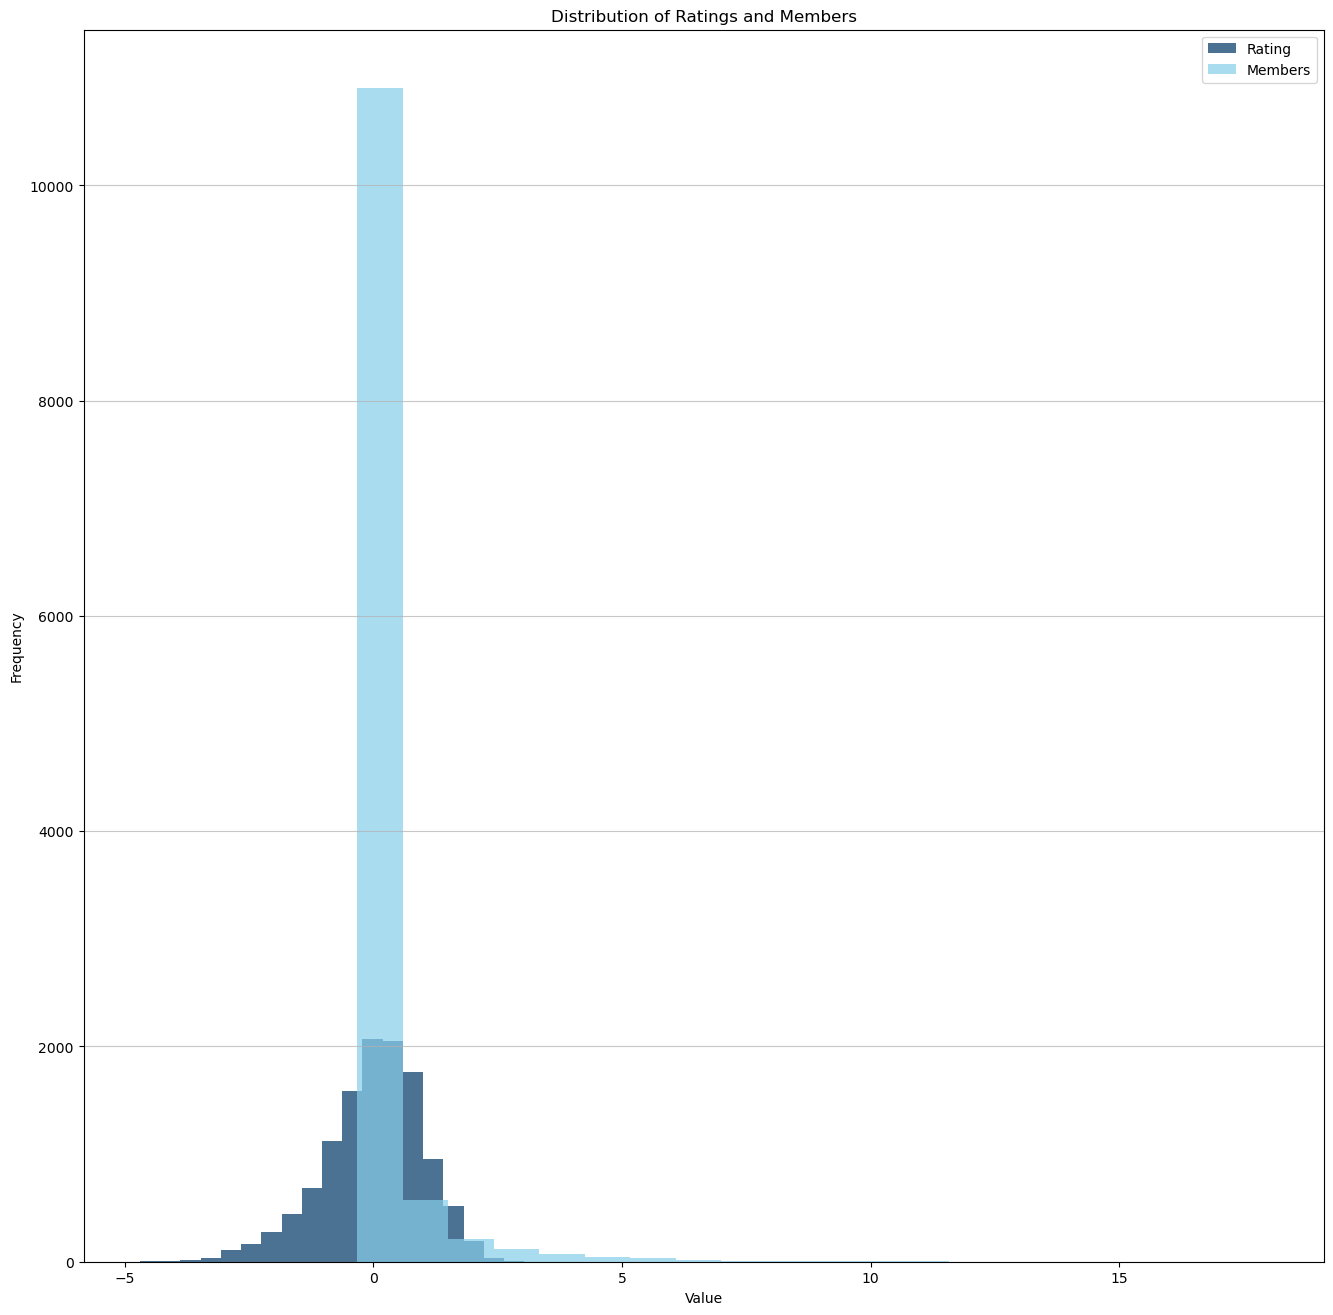

In [33]:
plt.figure(figsize=(16, 16))

# Distribution of Ratings
plt.hist(df_numerical['rating'], bins=20, color='#003666', alpha=0.7, label='Rating')

# Distribution of Members
plt.hist(df_numerical['members'], bins=20, color='skyblue', alpha=0.7, label='Members')

plt.title('Distribution of Ratings and Members')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', alpha=0.7)
plt.show()

In [36]:
from sklearn.metrics.pairwise import cosine_similarity


def recommend_similar_anime(df, target_anime, threshold=0.5):
    df['episodes'] = pd.to_numeric(df['episodes'], errors='coerce')
    df = df.dropna(subset=['episodes'])

    # Extract features for similarity computation
    features = df.drop(['name', 'type'], axis=1)
    
    # Find the target anime's features
    target_row = features[df['name'] == target_anime]
    
    if target_row.empty:
        return f"Anime '{target_anime}' not found in the dataset."
    
    similarities = cosine_similarity(target_row, features).flatten()
    

    similar_indices = np.where((similarities > threshold) & (df['name'] != target_anime))[0] #get index of similar anime leaving the target anime
    
    recommended_anime = df.iloc[similar_indices]['name'].tolist() #return list of recommended animes
    
    return recommended_anime

In [37]:
recommendations = recommend_similar_anime(df_numerical, 'Nana', threshold=0.5)
recommendations_series = pd.Series(recommendations)
top_5_recommendations = recommendations_series.value_counts().head(5)
print(top_5_recommendations)

Saru Kani Gassen           2
Shi Wan Ge Leng Xiaohua    2
Kimi no Na wa.             1
Rebirth Moon Divergence    1
Idol Fight Suchie-Pai 2    1
Name: count, dtype: int64


Evaluation

In [39]:
df_numerical['liked'] = ((df_numerical['rating'] >= 1)).astype(int)

In [40]:
df_numerical.head()

,anime_id,name,type,episodes,rating,members,Adventure,Cars,Comedy,Dementia,...,Shounen,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,liked
0,32281,Kimi no Na wa.,Movie,1.0,2.824474,3.292044,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5114,Fullmetal Alchemist: Brotherhood,TV,64.0,2.717032,14.002410,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,28977,Gintama°,TV,51.0,2.707265,1.732216,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,9253,Steins;Gate,TV,24.0,2.629126,11.833499,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,9969,Gintama&#039;,TV,51.0,2.619358,2.400518,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [41]:
df_numerical.isnull().sum()


anime_id          0
name              0
type              0
episodes        187
rating            0
               ... 
Supernatural      0
Thriller          0
Vampire           0
Yaoi              0
liked             0
Length: 89, dtype: int64

In [42]:
df1=df_numerical.dropna()

In [43]:
df1.isnull().sum()

anime_id        0
name            0
type            0
episodes        0
rating          0
               ..
Supernatural    0
Thriller        0
Vampire         0
Yaoi            0
liked           0
Length: 89, dtype: int64

In [44]:
df1.describe()

,anime_id,episodes,rating,members,Adventure,Cars,Comedy,Dementia,Demons,Drama,...,Shounen,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,liked
count,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,...,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000
mean,13404.150211,12.486729,0.006197,0.002928,0.073119,0.003128,0.119527,0.002790,0.017160,0.084446,...,0.004142,0.008453,0.000085,0.003381,0.000085,0.001183,0.000085,0.000085,0.000169,0.142604
std,11110.087616,47.097131,0.995442,1.000023,0.260343,0.055840,0.324421,0.052744,0.129872,0.278068,...,0.064228,0.091555,0.009194,0.058052,0.009194,0.034382,0.009194,0.009194,0.013002,0.349683
min,1.000000,1.000000,-4.696423,-0.331169,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3326.250000,1.000000,-0.572139,-0.327191,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9820.500000,2.000000,0.089602,-0.302679,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,23302.500000,12.000000,0.695181,-0.153817,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,34519.000000,1818.000000,3.439820,17.980218,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
print(df1['liked'].value_counts())

liked
0    10143
1     1687
Name: count, dtype: int64


In [46]:
# spilitting data into training and testing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df1.drop(['name', 'type','anime_id'], axis=1)
y = df1['liked']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (9464, 86)
Shape of X_test: (2366, 86)
Shape of y_train: (9464,)
Shape of y_test: (2366,)


In [47]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


An accuracy score of 1.0 indicates that the model achieved perfect accuracy on the testing data

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 1.0
Recall: 1.0
F1-score: 1.0


Interview Questions:

1. Can you explain the difference between user-based and item-based collaborative filtering?
   
User-Based Collaborative Filtering: User-based collaborative filtering makes recommendations by finding users similar to the target user and recommending items that those similar users have like.

Item-Based Collaborative Filtering Item-based collaborative filtering makes recommendations by finding items similar to the ones the target user has interacted with and recommending those similar items.



2. What is collaborative filtering, and how does it work? 

Collaborative filtering is a technique used in recommendation systems to predict a user's preferences based on the preferences 
of other users.The core idea is that users who have agreed in the past will agree in the future, and items that have similar appeal 
to users will continue to have similar appeal.